In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 1. 데이터 로드

In [2]:
festival = ["강경젓갈축제", "강릉커피축제", "강진청자축제", "고령대가야축제", "곡성세계장미축제", "관악강감찬축제", "광안리어방축제", "광주김치축제", "괴산고추축제", "군산시간여행축제", "금산인삼축제", "금호강바람소리길축제", "김제지평선축제", "김해분청도자기축제", "남원춘향제", "논산딸기축제", "담양대나무축제", "대구약령시한방문화축제", "대구치맥페스티벌", "대전사이언스페스티벌", "대전효문화뿌리축제", "동래읍성역사축제", "목포항구축제", "무주반딧불축제", "문경찻사발축제", "밀양아리랑대축제", "보령머드축제", "보성다향대축제", "봉화은어축제", "부산국제록페스티벌", "부안마실축제", "부천국제만화축제", "부평풍물대축제", "산청한방약초축제", "서산해미읍성축제", "석장리세계구석기축제", "세종축제", "소래포구축제", "수성못페스티벌", "수원화성문화제", "순창장류축제", "시흥갯골축제", "안동탈춤축제", "안성맞춤남사당바우덕이축제", "알프스하동섬진강문화재첩축제", "양양송이축제", "여주오곡나루축제", "연천구석기축제", "영덕대게축제", "영도다리축제", "영동난계국악축제", "영산강서창들녘억새축제", "영암왕인문화축제", "영주풍기인삼축제", "울산고래축제", "울산쇠부리축제", "울산옹기축제", "원주다이내믹댄싱카니발", "원주한지문화제", "음성품바축제", "이천쌀문화축제", "인천펜타포트음악축제", "임실N치즈축제", "장수한우랑사과랑축제", "정남진장흥물축제", "정선아리랑제", "제주들불축제", "지용제", "진도신비의바닷길축제", "진안홍삼축제", "진주남강유등축제", "진주유등축제", "천안흥타령축제", "청송사과축제", "추억의충장축제", "춘천마임축제", "탐라문화제", "탐라입춘굿축제", "태백산눈축제", "태화강마두희축제", "통영한산대첩축제", "평창송어축제", "평창효석문화제", "포항국제불빛축제", "하동야생차문화축제", "한산모시문화제", "한성백제문화제", "한탄강얼음트레킹축제", "함평나비축제", "화성뱃놀이축제", "화천산천어축제", "횡성한우축제"]
festival_dict = {"금산인삼축제": "금산세계인삼축제", "남원춘향제": "춘향제", "대전사이언스페스티벌": "대한민국과학기술축제", "석장리세계구석기축제": "공주석장리구석기축제", "세종축제": "세종한글술술축제", "안동탈춤축제": "안동국제탈춤페스티벌", "영산강서창들녘억새축제": "광주서창억새축제", "영주풍기인삼축제": "경북영주풍기인삼축제", "인천펜타포트음악축제": "인천펜타포트락페스티벌", "진주유등축제": "진주의수호자들-유등빛을지켜라", "천안흥타령축제": "천안흥타령춤축제", "추억의충장축제": "광주추억의충장축제", "탐라입춘굿축제": "탐라국입춘굿", "태백산눈축제": "태백겨울축제", "한탄강얼음트레킹축제": "철원한탄강얼음트레킹축제", "함평나비축제": "함평나비대축제", "화천산천어축제": "얼음나라화천산천어축제"}

In [3]:
df = pd.DataFrame(None, columns=["축제명", "연령대", "남성비율", "여성비율"])
df

,축제명,연령대,남성비율,여성비율


In [4]:
for title in festival:
	df = pd.concat((df, pd.read_csv(f"statistics_data/csv/{title}_성_연령별 내국인 방문자.csv")))

C:\Users\PC\AppData\Local\Temp\ipykernel_20512\894902048.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat((df, pd.read_csv(f"statistics_data/csv/{title}_성_연령별 내국인 방문자.csv")))


In [5]:
df

,축제명,연령대,남성비율,여성비율
0,강경젓갈축제,70세 이상,5.4,4.7
1,강경젓갈축제,60~69세,12.6,11.3
2,강경젓갈축제,50~59세,12.5,12.3
3,강경젓갈축제,40~49세,8.4,7.3
4,강경젓갈축제,30~39세,5.6,4.9
...,...,...,...,...
3,횡성한우축제,40~49세,9.6,7.7
4,횡성한우축제,30~39세,7.0,6.6
5,횡성한우축제,20~29세,6.1,6.1
6,횡성한우축제,10~19세,3.3,3.2


# 2. 데이터 품질 검증

In [6]:
df.groupby("축제명").sum(True)

,남성비율,여성비율
축제명,,
강경젓갈축제,51.8,48.1
강릉커피축제,48.6,51.3
강진청자축제,53.2,46.7
고령대가야축제,53.8,46.1
곡성세계장미축제,46.5,53.5
...,...,...
한탄강얼음트레킹축제,60.7,39.2
함평나비축제,52.3,47.8
화성뱃놀이축제,59.5,40.4


In [7]:
df.groupby("축제명").sum(True).sum(axis=1)

축제명
강경젓갈축제         99.9
강릉커피축제         99.9
강진청자축제         99.9
고령대가야축제        99.9
곡성세계장미축제      100.0
              ...  
한탄강얼음트레킹축제     99.9
함평나비축제        100.1
화성뱃놀이축제        99.9
화천산천어축제        99.9
횡성한우축제         99.9
Length: 92, dtype: float64

In [8]:
df["남성비율"] = df["남성비율"].astype(float)
df["여성비율"] = df["여성비율"].astype(float)
df

,축제명,연령대,남성비율,여성비율
0,강경젓갈축제,70세 이상,5.4,4.7
1,강경젓갈축제,60~69세,12.6,11.3
2,강경젓갈축제,50~59세,12.5,12.3
3,강경젓갈축제,40~49세,8.4,7.3
4,강경젓갈축제,30~39세,5.6,4.9
...,...,...,...,...
3,횡성한우축제,40~49세,9.6,7.7
4,횡성한우축제,30~39세,7.0,6.6
5,횡성한우축제,20~29세,6.1,6.1
6,횡성한우축제,10~19세,3.3,3.2


### 3. 축제별 집단 비율 생성

$$p_f = \text{pr}(\text{집단} g|\text{축제} f)$$

In [9]:
df_long = df.melt(
	id_vars=["축제명", "연령대"],
	value_vars=["남성비율", "여성비율"],
	var_name="성별",
	value_name="비율"
)
df_long["성별"] = df_long["성별"].map({
	"남성비율": "남성",
	"여성비율": "여성"
})
festival_sum = df_long.groupby("축제명")["비율"].transform("sum")

df_long["비율"] = df_long["비율"] / festival_sum
df_long

,축제명,연령대,성별,비율
0,강경젓갈축제,70세 이상,남성,0.054054
1,강경젓갈축제,60~69세,남성,0.126126
2,강경젓갈축제,50~59세,남성,0.125125
3,강경젓갈축제,40~49세,남성,0.084084
4,강경젓갈축제,30~39세,남성,0.056056
...,...,...,...,...
1467,횡성한우축제,40~49세,여성,0.077077
1468,횡성한우축제,30~39세,여성,0.066066
1469,횡성한우축제,20~29세,여성,0.061061
1470,횡성한우축제,10~19세,여성,0.032032


# 3. 축제 벡터 생성

### 3-1. 축제 소개컬럼 추가

In [10]:
with open("data/공통정보조회_final.json", encoding="utf-8") as f:
	commoninfo = json.load(f)
commoninfo_df = pd.DataFrame([{"contentid": a.get("contentid"), "title": a.get("title").replace(" ", "")} for a in commoninfo])
commoninfo_df.head()

,contentid,title
0,3113671,가락몰빵축제전국빵지자랑
1,3379778,가락옥토버페스트미식야행
2,694576,가야문화축제
3,712175,가파도청보리축제
4,3503909,가평양떼목장수국축제


In [11]:
with open("data/반복정보조회_final.json", encoding="utf-8") as f:
	detailinfo = json.load(f)
detailinfo_df = pd.DataFrame(detailinfo)[["contentid", "infotext"]].groupby("contentid").agg(" ".join)
detailinfo_df.head()

,infotext
contentid,
1004281,"의왕어린이철도축제가 5월 3일 왕송호수공원 일원(왕송호수공원, 철도박물관)에서 펼쳐..."
1008843,1999년을 시작으로 올해 27회를 맞이하는 서울시 대표 음악축제 '서울드럼페스티벌...
1018971,"우리나라 국토정정중앙 중심 배꼽, 인간의 중심 배꼽 처럼 배꼽이 가진 의미와 문화..."
1019773,2025 제주레저힐링축제는 2025년 9월 5일부터 7일까지 3일간 제주시 조천읍 ...
1026422,"최근 지역 사회를 안타깝게 한 산불로 인해 모두가 큰 아픔을 겪은 가운데, 함께 이..."


In [12]:
df = commoninfo_df.merge(detailinfo_df, on="contentid")
df

,contentid,title,infotext
0,3113671,가락몰빵축제전국빵지자랑,"전국 각지의 농수축산물이 모이는 가락몰에서, 전국 각지의 빵 맛집들이 모여 서울 최..."
1,3379778,가락옥토버페스트미식야행,전국 각지 농수산물이 모이는 서울시 송파구 가락몰 3층 하늘공원에서 루프탑 야외축제...
2,694576,가야문화축제,가야문화축제는 6가야의 맹주였던 금관가야를 바탕으로 한 역사와 전통을 자랑하는 김해...
3,712175,가파도청보리축제,가파도 청보리의 품종향맥은 타 지역보다 2배이상 자라는 제주의 향토 품종으로 전국에...
4,3503909,가평양떼목장수국축제,"가평의 아름다운 자연 속에서 펼쳐지는 본 축제는, 활짝 핀 가을 수국의 물결과 사랑..."
...,...,...,...
763,2991796,DDP여름축제:디자인홀리데이,DDP 여름축제 ‘디자인 홀리데이’는 DDP 사계절 축제 중 여름 휴가철을 맞아 진...
764,3486606,"MyOwnPlanet,지구야놀자",서울새활용플라자(SUP)가 2025년 4월 제55회 지구의 날(Earth Day)을...
765,3331805,NS푸드페스타,"최고의 맛을 먹고! 보고! 즐기는""NS푸드페스타""는 국내 농수축산업과 식품산업의 발..."
766,3544786,WOW다놀자!양평페스타,다놀자 양평페스타는 양평캠퍼스 전역이 하나의 거대한 놀이터로 변신하는 특별한 축제이...


In [13]:
df2 = pd.DataFrame({"title": festival, "infotext": np.nan})
for i, title_1 in enumerate(df2.title.to_list()):
	if title_1 in df.title.to_list():
		df2.loc[i, "infotext"] = df[df["title"] == title_1]["infotext"].values[0]
	elif festival_dict.get(title_1):
		title_2 = festival_dict.get(title_1)
		print(title_2)
		df2.loc[i, "infotext"] = df[df["title"] == title_2]["infotext"].values[0]

금산세계인삼축제
춘향제
대한민국과학기술축제
공주석장리구석기축제
세종한글술술축제
안동국제탈춤페스티벌
광주서창억새축제
경북영주풍기인삼축제
인천펜타포트락페스티벌
진주의수호자들-유등빛을지켜라
천안흥타령춤축제
광주추억의충장축제
탐라국입춘굿
태백겨울축제
철원한탄강얼음트레킹축제
함평나비대축제
얼음나라화천산천어축제


C:\Users\PC\AppData\Local\Temp\ipykernel_20512\1060439909.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '지방자치단체 중 최초로 개최된 커피축제로 매해 30만명이 넘는 관람객과 커피 업계 종사자 뿐만 아니라 커피 애호가들을 커피도시 강릉으로 불러 모으는 강릉 대표 축제이다. 이제 커피는 단순히 먹거리가 아닌 문화로 자리 잡았다. GCF는 커피문화를 이끄는 리더로서 그 역할을 하고 있다. 1. 도심 축제<br>- 웰컴커피숍<br>- 스탬프랠리<br><br>2. 커피거리축제<br>- 별이빛나는밤에<br>- 별의별강릉커피<br>- 커피축제 Radio<br>- 커피놀이터<br>- 원두상점<br>- 커피용품전시·판매<br>-  커피크닉<br>- 100人100味<br>- 커피웨이브<br>- 커피축제마켓<br>- 수공예마켓<br>- 커피버스킹<br>- 커피와인문학<br>- 커피체험존<br>- 커피스타<br><br>3. 부대프로그램<br>- 불꽃놀이<br>- 영수증이벤트<br>-  대형케이크퍼포먼스<br><br>축제장 내 먹거리 부스가 없으므로 인근 지역 식당 이용 바랍니다.' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[i, "infotext"] = df[df["title"] == title_1]["infotext"].values[0]


In [14]:
df2[df2.infotext.isna()]

,title,infotext
0,강경젓갈축제,NaN
2,강진청자축제,NaN
28,봉화은어축제,NaN
44,알프스하동섬진강문화재첩축제,NaN
54,울산고래축제,NaN
57,원주다이내믹댄싱카니발,NaN
58,원주한지문화제,NaN
60,이천쌀문화축제,NaN
79,태화강마두희축제,NaN
86,한성백제문화제,NaN


In [15]:
df2.loc[0, "infotext"] = "전국 최고의 맛을 자랑하는 강경맛깔젓과 상월 고구마가 만나 여러분께 새로운 기쁨을 선사하고자 합니다.\n지역 내의 특산물이 한곳에 모여 더욱 풍성한 가을 축제가 마련되었습니다.\n대한민국 젓갈 명소 강경에서 신선하고 다양한 젓갈과 함께 좋은 땅의 기운으로 완성된 상월명품고구마로 넉넉한 덤과 따뜻한 고향의 정을 듬뿍 느껴보시길 바랍니다.\n또한 다양한 문화행사와 체험 프로그램을 즐기고 근대문화거리와, 강경포구, 옥녀봉 그리고 아름다운 금강 둔치를 거닐며 먹거리, 볼거리, 즐길 거리가 함께 어우러진 추억과 낭만이 가득한 축제를 즐겨보시길 소망합니다.주요 행사로는 팔도관광객 새우젓 담그기, 외국인 까나리액젓 김치 담그기, 엄마와 딸 황석어젓 김치 담그기, 젓갈통 지고 달리기, 젓갈 함지박 이고 달리기, 맛깔 젓 OX퀴즈와 경매전, 새우젓 높이 쌓기, 황산골 선비밥상, 나루터 가을음악회, 젓갈장사 씨름대회, 논산 계룡시민 화합한마당 등이 있다. 이밖에 강경젓갈 홍보관 전시, 놀뫼 향토 특산품전, 퓨전 젓갈음식 전시, 젓갈 옹기전, 강경 옛 모습 사진전, 금강권 관광협의회 특별전, 젓갈축제 사진콘테스트, 강경 젓갈 교역전, 황포돛배 재현 등이 상설 행사로 마련되어 있으며, 젓갈 관광열차 운행, 젓갈 버스 투어, 향토특색음식점 운영, 갈대숲 오솔길 걷기, 강경 젓갈캐릭터 상품전 등도 진행되고 있다."

df2.loc[2, "infotext"] = "낮에는 천 년의 전통, 밤에는 환상적 야간 경관을 즐길 수 있는 강진!\n소망등 달기, 힐링 불멍캠프, 야외족욕, 청자소원등 달기 등 다채로운 즐길거리가 가득한 고품격 축제~!\n절반의 가격으로 즐길 수 있는 강진의 반값여행 혜택도 놓치지 마세요 ~!\n봄날의 설렘~! 강진의 아름다움이 여러분을 기다립니다. 눈부신 고려청자의 멋과 숨결 ~!\n화목가마 불지피기, 명품청자 판매전, 청자빚기 체험, 고려청자 유물특별전과 함께 고려왕실 행사 퍼레이드 등"

df2.loc[28, "infotext"] = "청정 봉화의 내성천에서 펼쳐지는 은빛 은어의 향연!\n맑고 깨끗한 자연 속에서 건강과 즐거움을 동시에 누릴 수 있는 특별한 여름 이야기.\n‘은어잡이 체험’이라는 이색적이고 역동적인 프로그램이 큰 인기를 끌었고, 참가자들은 맑고 깨끗한 자연 속에서 은어를 직접 잡는 특별한 경험을 즐겼습니다.\n이러한 체험형 프로그램과 지역민들의 뜨거운 참여, 봉화의 아름다운 자연환경이 어우러져 봉화은어축제는 점차 전국적인명성을 얻게 되었습니다. 또한 봉화은어축제는 단순한 어류 체험을 넘어, 자연 생태 보전의 중요성을 알리고, 공연, 전통체험, 먹거리 장터 등 다양한 문화 프로그램을 접목함으로써 자연·사람·문화가 함께하는 오감만족 축제로 자리잡게 되었습니다."

df2.loc[44, "infotext"] = "알프스하동섬진강문화재첩축제는 경상남도 하동군 섬진강 일원에서 열리는 대표적인 여름 축제로, 재첩 잡기 체험을 비롯해 문어 잡기, 은어 잡기, 물놀이 등 다양한 섬진강 체험 활동과 지역 문화 공연을 즐길 수 있습니다. \n특히, '황금재첩을 찾아라'와 같은 이벤트와 섬진강을 배경으로 한 레이저 쇼, 불꽃놀이 등 다채로운 프로그램이 마련되어 있습니다. \n주요 프로그램\n황금재첩을 찾아라: 축제의 메인 이벤트로 황금재첩을 잡으면 특별한 상품을 받을 수 있습니다.\n재첩 잡기 체험: 맑은 섬진강에서 직접 재첩을 잡는 체험 활동입니다.\n다양한 체험: 문어 잡기, 은어 잡기, 물놀이 등 섬진강에서 즐길 수 있는 다양한 체험이 준비되어 있습니다.\n문화 공연: KBS개그콘서트, 조성모 콘서트, 국악공연, 청년문화 페스티벌 등 다채로운 문화 공연이 열립니다.\n섬진강과 함께하는 이벤트: 섬진강을 배경으로 한 레이저 쇼와 불꽃놀이가 펼쳐집니다.\n화합 행사: 섬진강교에서 하동군과 광양시가 함께하는 '영원함 줄다리기' 행사도 진행됩니다. \n특징\n시원한 여름 피서: 청정 1급수인 섬진강에서 시원한 여름을 보내기에 좋습니다.\n온 가족이 함께 즐기는 축제: 아이부터 어른까지 모든 연령대가 함께 즐길 수 있는 체험과 이벤트가 풍성합니다.\n하동의 자연과 문화를 만끽: 백사청송의 하동송림과 섬진강변에서 자연을 즐기며 지역의 문화 행사도 접할 수 있습니다. "

df2.loc[54, "infotext"] = "2025년 9월, 울산 장생포 고래문화특구에서 열리는 제29회 울산고래축제는 '고래의 선물(Gift from a Whale)' 이라는 주제 로 펼쳐집니다. 과거 포경의 중심지였던 장생포는 이제 고래와 인간이 공존하는 생태도시로 거듭났습니다. 울산 남구와 고래문화재단은 이 변화의 상징 위에, 고래가 전하는 4가지 선물 - 희망, 용기, 사랑, 행복을 담아낸 특별한 축제를 시민과 함께 만들어 갑니다.\n올해 축제는 생태와 예술, 기술과 체험이 어우러진 미래형 콘텐츠로 가득합니다. AI 로봇과 미디어 기술이 융합된 개막 공연, 시민이 참여하는 고래 퍼레이드, 어린이 노래극과 가족 댄스·가요제, AR과 로봇 체험이 가능한 스마트체험존, 그리고 장생포의 감성을 담은 푸드·플리마켓까지! 축제의 중심은 언제나 '시민'입니다. 우리는 이번 축제를 통해 시민과 예술인, 지역과 미래가 연결되는 울산만의 축제 모델을 선보이고자 합니다.\n함께 웃고, 느끼고, 꿈꾸며 고래가 건네는 선물처럼 풍성한 가을날, 울산 장생포에서 여러분을 기다립니다."

df2.loc[57, "infotext"] = "K-Pop 댄싱과 랜덤 플레이스댄스, 퍼포먼스가 가능한 모든 장르를 아우르는 프리댄싱 등 세계가 주목하는 K-댄스의 모든것을 보여주는 축제\n시민의 주체적이고 자발적인 참여를 원동력으로 성장하는 시민참여형 축제\n시민기획단, 자원봉사단 등 다양한 시민참여 프로그램 운영\n축제 환경문제 해결 및 친황경 축제개최 기반을 마련하여 지속가능한 ESG경영실천\n시민참여형 생활문화의 확산으로 지속가능한 자체 콘텐츠 구현"

df2.loc[58, "infotext"] = "원주한지문화제는 원주 지역의 전통 한지를 세계에 알리고 한지의 우수성을 널리 알리기 위해 1999년에 시작된 축제입니다. 닥나무가 많아 '한지의 본고장'으로 불리는 원주에서 열리며, 한지의 과거, 현재, 미래를 조명하고 다양한 전시, 체험, 공연 등을 통해 한지의 매력을 선보입니다. 2024년에는 '원주 한지 세계 문화유산이 되다'라는 주제로 유네스코 등재를 기원하는 행사도 열렸습니다. \n주요 내용\n목적: 원주한지문화제는 한지문화의 대중적 확산과 한지문화자원 육성, 그리고 국내외에 한지의 우수성을 알리는 것을 목표로 합니다.\n역사: 1999년, 사라져가는 원주 전통 한지 제작에 대한 시민들의 관심으로 시작된 문화 운동의 결실입니다.\n주요 행사:\n한지 공예 체험 (예: 지화공예, 무드 등 만들기)\n한지 장인의 시연\n한지 직접 뜨기 체험\n유네스코 등재 기원 소원 등 설치\n한지 관련 전시 및 공연\n"

df2.loc[60, "infotext"] = "예로부터 임금님께 쌀을 진상하던 이천은 쌀의 고장으로 널리 알려졌습니다.\n윤기있고 밥맛 좋은 이천쌀은 따사로운 햇살과 맑은 물과 기름진 흙이 어우러져서 만들어내는 전국 제일의 쌀이다라는 명성을 얻고 있습니다.\n자연의 혜택과 인간의 노력으로 영그는 쌀을 수확하여 그 추수의 기쁨을 더불어 나누고자 이천쌀문화 잔치마당을 펼칩니다.\n알차게 여문 햅쌀을 직접 구입할 수 있으며, 어린 세대에겐 전통 농경문화를 체험케 하고, 어른들에겐 옛 향수를 자아내면서 함께 어울릴 수 있는 축제의 한마당에 당신을 초대합니다."

df2.loc[79, "infotext"] = "울산 중구 원도심에서 펼쳐지는 '마두희' 큰줄당기기와 태화강에서의 수상줄당기기, 치맥페스티벌, DJ와 함께하는 EDM 파티, 씨름 대회등 다양한 체험으로 여름이 핫한 2025 태화강마두희 축제이다.\n[행사내용]\n1. 대표프로그램\n- 울산 큰줄당기기 마두희\n- 전국 태화강 마두희 춤 경연대회\n- 단오맞이 한마당 씨름대회\n[태화강 마당]\n- 수상 줄당기기, 수상 서바이벌 게임, 태화강 수상체험\n- 태화강 태화나루 치맥페스티벌\n- 찰방찰방 물놀이, 플라잉 워터쇼\n[공연마당]\n- 나도 버스킹, 나도 가수왕\n- 전문 마당극 공연, 전문거리 공연\n- 우리 동네 가수왕\n- 울산큰애기가요제\n- 생활예술인 한마당\n[어린이 마당]\n- 줄줄이 어린이 탐험단 스탬프 투어, 어린이놀이터\n[참여마당]\n- 마두랑 차(茶)마시기\n- 마두희도 식후경\n- 태화강마두희 장터\n[동헌마당]\n- 전국소리경연대회\n- 도호부사 행차\n- 학이 날아든 동헌\n[마두희마당]\n- 마두희 큰줄제작, 골목줄당기기(유‧초등부, 동대항)\n2.부대행사\n- 전국 거리공연(버스킹) 대회\n- 청춘의 다리-태화강! 와인&뮤직에 빠지다\n- 축제사진 인증 이벤트\n- 마두랑 시민 퍼레이드"

df2.loc[86, "infotext"] = "한성백제문화제는 2천 년 전 백제의 수도였던 서울 송파구에서 열리는 역사문화 축제입니다. 2008년 예비축제, 2014년 유망축제로 선정되었으며, 올림픽공원 일대에서 매년 10월 첫째 주 목요일부터 일요일까지 열립니다. 백제의 찬란한 역사와 문화를 계승하고, 이를 현대적 K-컬처로 재해석하여 보여주는 것이 특징입니다. \n주요 행사 및 프로그램\n개막공연 및 축하공연: 국악, 클래식, K-팝 등 다양한 장르의 공연과 드론 라이트쇼가 펼쳐집니다.\n역사문화거리행렬: 한성백제 시대의 위엄을 재현하는 퍼레이드입니다.\n체험 프로그램: 백제체험마을, 백제 병영 체험 등 백제 문화와 역사를 직접 체험할 수 있습니다.\n한성백제장터: 먹거리와 전통 시장을 즐길 수 있습니다.\n몽촌토성성곽돌기: 몽촌토성을 따라 걸으며 역사를 느낄 수 있습니다.\n폐막공연: 국악과 K-팝 등 다양한 음악이 어우러진 콘서트가 열립니다. "

df2.loc[91, "infotext"] = "횡성한우축제는 대한민국을 대표하는 명품한우 ‘횡성한우’의 우수성을 널리 알리는 한편 횡성한우와 연계한 다채로운 콘텐츠와 테마프로그램 운영을 통해 수많은 방문객과 즐거움과 풍요로움을 나누는 축제입니다.\n횡성한우축제는 '횡성한우'의 우수성을 알리고 방문객들에게 풍요로움을 선사하는 대한민국 대표 명품 한우 축제입니다. 횡성한우를 저렴하게 맛볼 수 있는 먹거리 존과 함께 다양한 문화 및 즐길 거리(음악 공연, 버스킹, 어린이 놀이터, 지역 특산품 직거래 등)가 마련되어 있어 단순히 먹거리 축제를 넘어선 종합 문화 관광 축제로 발전하고 있습니다. "

In [16]:
df2.infotext.isna().sum()

np.int64(0)

In [17]:
df2

,title,infotext
0,강경젓갈축제,전국 최고의 맛을 자랑하는 강경맛깔젓과 상월 고구마가 만나 여러분께 새로운 기쁨을 ...
1,강릉커피축제,지방자치단체 중 최초로 개최된 커피축제로 매해 30만명이 넘는 관람객과 커피 업계 ...
2,강진청자축제,"낮에는 천 년의 전통, 밤에는 환상적 야간 경관을 즐길 수 있는 강진!\n소망등 달..."
3,고령대가야축제,대가야의 독특한 역사와 문화를 배우고 즐길 수 있는 차별화된 축제이다.대가야 고도 ...
4,곡성세계장미축제,"곡성군의 랜드마크인 <섬진강 기차마을>에서 75,000㎡ 규모의 대형 장미 정원에 ..."
...,...,...
87,한탄강얼음트레킹축제,2013년부터 매년 1월에 강원도 철원군 한탄강 일원에서 강을 따라 얼음 위를 트레...
88,함평나비축제,"산업자원이나 관광자원이 전무하고, 특별한 특산품이나 먹을거리도 부족한 지역에서 살아..."
89,화성뱃놀이축제,화성시 대표축제 '화성 뱃놀이 축제'는 요/보트 승선체험을 할 수 있는 수도권 최...
90,화천산천어축제,강원특별자치도 화천에서 열리는 얼음나라화천 산천어축제는 2011년 미국 CNN이 선...


### 3-2. 축제 태그 벡터 생성

In [20]:
import re
import json
import joblib
import numpy as np
import pandas as pd
from soynlp.tokenizer import LTokenizer
from soynlp.normalizer import only_hangle
from sklearn.base import BaseEstimator, TransformerMixin

with open("model/combined_scores_v1.json", encoding="utf-8") as f:
	tokenizer = LTokenizer(scores=json.load(f))

def build_tau_array(tag_names, config, default_th=0.5):
	thres = config.get("thresholds", {})
	tau = np.array([thres.get(tag, default_th) for tag in tag_names], dtype=float)

	return tau

# def theta_margin_topk_from_proba(proba, tau, k=2, use_margin_for_theta=True):
# 	n_samples, n_tags = proba.shape
# 	theta = np.zeros_like(proba, dtype=float)
#
# 	for i in range(n_samples):
# 		p = proba[i]  # (n_tags,)
#
# 		# 1) margin score 계산
# 		s = np.zeros_like(p, dtype=float)
# 		above = p >= tau
# 		s[above] = (p[above] - tau[above]) / (1.0 - tau[above] + 1e-8)
#
# 		# 2) margin > 0 후보
# 		candidates = np.where(s > 0)[0]
#
# 		if len(candidates) >= k:
# 			# 후보 안에서 margin 기준 top-k
# 			top_idx_in_cand = np.argsort(s[candidates])[-k:]
# 			top_tags = candidates[top_idx_in_cand]
# 		elif len(candidates) == 1 and k > 1:
# 			first = candidates[0]
# 			# 나머지는 proba 기준으로 채우기
# 			order = np.argsort(p)
# 			second = None
# 			for idx in order[::-1]:
# 				if idx != first:
# 					second = idx
# 					break
# 			if second is None:
# 				top_tags = np.array([first])
# 			else:
# 				top_tags = np.array([first, second])
# 		else:
# 			# 후보 0개 → proba 기준 top-k
# 			top_tags = np.argsort(p)[-k:]
#
# 		# 3) theta 계산 (top_tags만 사용, 나머지는 0)
# 		if use_margin_for_theta:
# 			# 임계값 반영 margin 점수를 가중치로 사용
# 			w = s[top_tags].astype(float)
# 		else:
# 			# 원래 예측 확률을 가중치로 사용
# 			w = p[top_tags].astype(float)
#
# 		# 음수 방지 (이론상 없어야 하지만 안전용)
# 		w = np.maximum(w, 0.0)
#
# 		if (w > 0).sum() == 1 and k > 1:
# 			# margin이든 뭐든 간에, 이 경우에는 proba로 다시 섞기
# 			w = p[top_tags].astype(float)
# 			w = np.maximum(w, 0.0)
#
# 		den = w.sum()
# 		if den > 0:
# 			w = w / den  # 합이 1이 되도록 정규화
# 		else:
# 			# 혹시 전부 0이면 균등분배
# 			w = np.ones_like(w, dtype=float) / len(w)
#
# 		theta[i, top_tags] = w
#
# 	return theta

def theta_margin_topk_from_proba(proba, tau, k=2, gamma=1.0):
	n_samples, n_tags = proba.shape
	theta = np.zeros_like(proba, dtype=float)

	for i in range(n_samples):
		p = proba[i]  # (n_tags,)

		# 1) margin score 계산 (top-k 선택용)
		s = np.zeros_like(p, dtype=float)
		above = p >= tau
		s[above] = (p[above] - tau[above]) / (1.0 - tau[above] + 1e-8)

		# 2) margin > 0 후보
		candidates = np.where(s > 0)[0]

		if len(candidates) >= k:
			# 후보 안에서 margin 기준 top-k
			top_idx_in_cand = np.argsort(s[candidates])[-k:]
			top_tags = candidates[top_idx_in_cand]
		elif len(candidates) == 1 and k > 1:
			first = candidates[0]
			# 나머지는 proba 기준으로 채우기
			order = np.argsort(p)
			second = None
			for idx in order[::-1]:
				if idx != first:
					second = idx
					break
			if second is None:
				top_tags = np.array([first])
			else:
				top_tags = np.array([first, second])
		else:
			# 후보 0개 → proba 기준 top-k
			top_tags = np.argsort(p)[-k:]

		# 3) theta 계산: top_tags에 대해서만 확률 기반 가중치
		w = p[top_tags].astype(float)

		# 선택적으로 분포를 조금 평탄/날카롭게 하고 싶으면 gamma 사용
		# gamma < 1  → 차이를 줄임 (more 균등)
		# gamma = 1  → 원래 확률 비율 그대로
		# gamma > 1  → 차이를 키움 (more 쏠림)
		if gamma != 1.0:
			w = np.power(w, gamma)

		# 음수 방지 (이론상 불필요하지만 안전용)
		# w = np.maximum(w, 0.0)

		# den = w.sum()
		# if den > 0:
        #     # 합이 1이 되도록 정규화
		# 	w = w / den
		# else:
		# 혹시 전부 0이면 균등분배
		# w = np.ones_like(w, dtype=float) / len(w)

		theta[i, top_tags] = w

	return theta

def clean_text_model(text: str) -> str:
    text = re.sub(r"\d{4}\s*년", " ", text)
    text = re.sub(r"\d+\s*월", " ", text)
    text = re.sub(r"\d+\s*일", " ", text)
    text = re.sub(r"\d+\s*일간", " ", text)
    text = re.sub(r"\d+\s*박\s*\d+\s*일", " ", text)
    text = re.sub(r"\d+\s*시", " ", text)
    text = re.sub(r"\d+\s*분", " ", text)
    text = re.sub(r"\d+\s*초", " ", text)
    text = re.sub(r"\d+\s*주년", " ", text)
    text = re.sub(r"\d+\s*회", " ", text)
    text = re.sub(r"\d+\s*차", " ", text)
    text = re.sub(r"\d+\s*명", " ", text)
    text = only_hangle(text)
    return " ".join(tokenizer.tokenize(text))

class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([clean_text_model(t) for t in X])

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return np.array(["text"], dtype=object)
        return np.asarray(input_features, dtype=object)

with open("model/config_v1.json", encoding="utf-8") as f:
	config = json.load(f)

with open("model/pipe_ovr_v1.pkl", "rb") as f:
	pipe_ovr = joblib.load(f)

with open("model/tag_name_v1.json", encoding="utf-8") as f:
	tag_name = json.load(f)

tau_array = build_tau_array(tag_name, config)

In [21]:
festival_vector = pd.concat((df2[["title"]], pd.DataFrame(theta_margin_topk_from_proba(pipe_ovr.predict_proba(df2.infotext), tau_array), columns=tag_name)), axis=1)
festival_vector

,title,activity,children,culture,food,nature,night,season
0,강경젓갈축제,0.000000,0.000000,0.000000,0.650081,0.582322,0.0,0.000000
1,강릉커피축제,0.000000,0.000000,0.384376,0.851857,0.000000,0.0,0.000000
2,강진청자축제,0.612670,0.000000,0.662282,0.000000,0.000000,0.0,0.000000
3,고령대가야축제,0.550184,0.000000,0.624718,0.000000,0.000000,0.0,0.000000
4,곡성세계장미축제,0.512403,0.000000,0.000000,0.000000,0.760916,0.0,0.000000
...,...,...,...,...,...,...,...,...
87,한탄강얼음트레킹축제,0.000000,0.553339,0.000000,0.535738,0.000000,0.0,0.000000
88,함평나비축제,0.658610,0.545290,0.000000,0.000000,0.000000,0.0,0.000000
89,화성뱃놀이축제,0.882578,0.000000,0.941675,0.000000,0.000000,0.0,0.000000
90,화천산천어축제,0.715551,0.000000,0.000000,0.000000,0.000000,0.0,0.707806


# 4. 태그별 집단 분포 확인

In [22]:
df_long.columns = ["title", "age_group", "sex", "p_fg"]
df_long

,title,age_group,sex,p_fg
0,강경젓갈축제,70세 이상,남성,0.054054
1,강경젓갈축제,60~69세,남성,0.126126
2,강경젓갈축제,50~59세,남성,0.125125
3,강경젓갈축제,40~49세,남성,0.084084
4,강경젓갈축제,30~39세,남성,0.056056
...,...,...,...,...
1467,횡성한우축제,40~49세,여성,0.077077
1468,횡성한우축제,30~39세,여성,0.066066
1469,횡성한우축제,20~29세,여성,0.061061
1470,횡성한우축제,10~19세,여성,0.032032


In [23]:
df_theta = festival_vector.melt(
	id_vars="title",
	value_vars=tag_name,
	var_name="tag",
	value_name="theta"
)
df_theta = df_theta[df_theta.theta != 0]
df_theta.head()

,title,tag,theta
2,강진청자축제,activity,0.612670
3,고령대가야축제,activity,0.550184
4,곡성세계장미축제,activity,0.512403
6,광안리어방축제,activity,0.585968
9,군산시간여행축제,activity,0.624306


In [24]:
df_theta[df_theta.title == "강진청자축제"]

,title,tag,theta
2,강진청자축제,activity,0.612670
186,강진청자축제,culture,0.662282


In [25]:
df_ftg = df_long.merge(df_theta, on="title")
df_ftg

,title,age_group,sex,p_fg,tag,theta
0,강경젓갈축제,70세 이상,남성,0.054054,food,0.650081
1,강경젓갈축제,70세 이상,남성,0.054054,nature,0.582322
2,강경젓갈축제,60~69세,남성,0.126126,food,0.650081
3,강경젓갈축제,60~69세,남성,0.126126,nature,0.582322
4,강경젓갈축제,50~59세,남성,0.125125,food,0.650081
...,...,...,...,...,...,...
2939,횡성한우축제,20~29세,여성,0.061061,food,0.838099
2940,횡성한우축제,10~19세,여성,0.032032,culture,0.459790
2941,횡성한우축제,10~19세,여성,0.032032,food,0.838099
2942,횡성한우축제,0~9세,여성,0.006006,culture,0.459790


In [26]:
df_ftg["weighted"] = df_ftg["theta"] * df_ftg["p_fg"]

tag_group = df_ftg.groupby(["tag", "sex", "age_group"], as_index=False).agg(
		num=("weighted", "sum"), # 분자: Σ_f theta_ft * p_f(g)
		den=("theta", "sum") # 분모: Σ_f theta_ft
	)


# p(g|t) 계산
tag_group["p_gt"] = tag_group["num"] / tag_group["den"]
tag_group

,tag,sex,age_group,num,den,p_gt
0,activity,남성,0~9세,0.206773,37.751962,0.005477
1,activity,남성,10~19세,1.288027,37.751962,0.034118
2,activity,남성,20~29세,2.788202,37.751962,0.073856
3,activity,남성,30~39세,3.091796,37.751962,0.081898
4,activity,남성,40~49세,3.571215,37.751962,0.094597
...,...,...,...,...,...,...
107,season,여성,30~39세,0.234752,3.502060,0.067033
108,season,여성,40~49세,0.301004,3.502060,0.085951
109,season,여성,50~59세,0.394152,3.502060,0.112548
110,season,여성,60~69세,0.249963,3.502060,0.071376


In [27]:
# 전체 기준 집단 분포 계산
p_all = df_long.groupby(["sex", "age_group"], as_index=False)["p_fg"].mean().rename(columns={"p_fg": "p_all"})
p_all

,sex,age_group,p_all
0,남성,0~9세,0.005554
1,남성,10~19세,0.034247
2,남성,20~29세,0.073627
3,남성,30~39세,0.080235
4,남성,40~49세,0.093278
5,남성,50~59세,0.113777
6,남성,60~69세,0.089126
7,남성,70세 이상,0.035042
8,여성,0~9세,0.006423
9,여성,10~19세,0.034377


In [28]:
# p_all 을 tag_group에 조인
tag_lift = tag_group.merge(
	p_all,
	on=["sex", "age_group"],
	how="left"
)

# Lift 계산
eps = 1e-8
tag_lift["lift_gt"] = tag_lift["p_gt"] / (tag_lift["p_all"] + eps) # 성별·연령 집단 태그 상대 참여도

# 성별·연령 집단 태그 상대 참여도

In [29]:
tag_lift

,tag,sex,age_group,num,den,p_gt,p_all,lift_gt
0,activity,남성,0~9세,0.206773,37.751962,0.005477,0.005554,0.986170
1,activity,남성,10~19세,1.288027,37.751962,0.034118,0.034247,0.996223
2,activity,남성,20~29세,2.788202,37.751962,0.073856,0.073627,1.003103
3,activity,남성,30~39세,3.091796,37.751962,0.081898,0.080235,1.020722
4,activity,남성,40~49세,3.571215,37.751962,0.094597,0.093278,1.014141
...,...,...,...,...,...,...,...,...
107,season,여성,30~39세,0.234752,3.502060,0.067033,0.071080,0.943055
108,season,여성,40~49세,0.301004,3.502060,0.085951,0.081125,1.059489
109,season,여성,50~59세,0.394152,3.502060,0.112548,0.106689,1.054923
110,season,여성,60~69세,0.249963,3.502060,0.071376,0.073779,0.967434


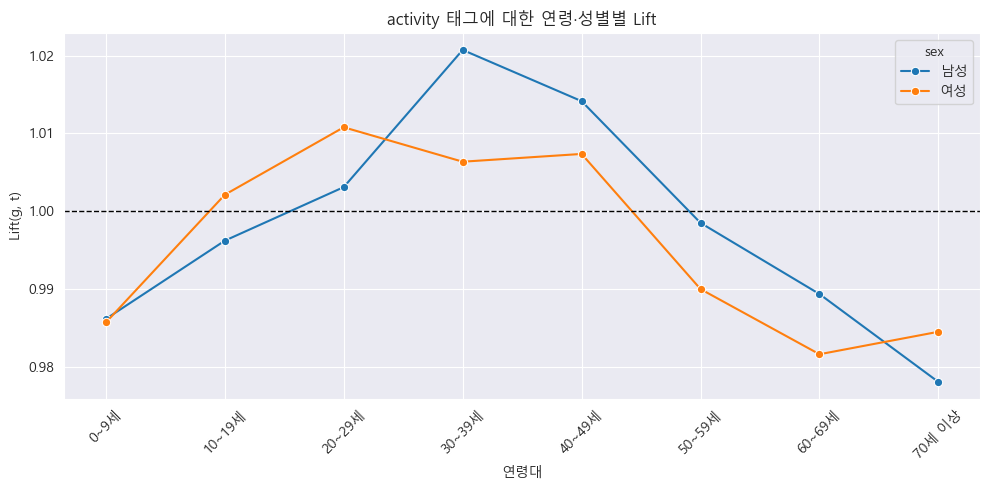

In [30]:
target_tag = "activity"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

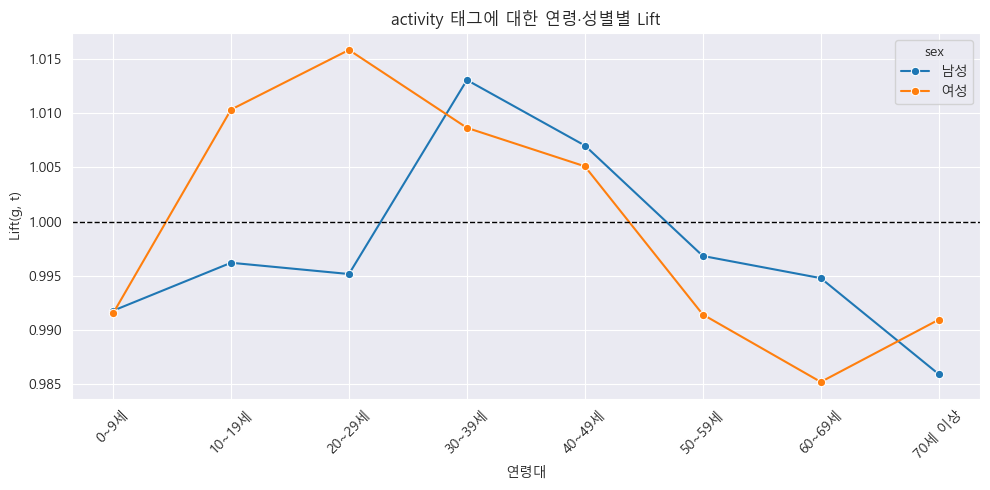

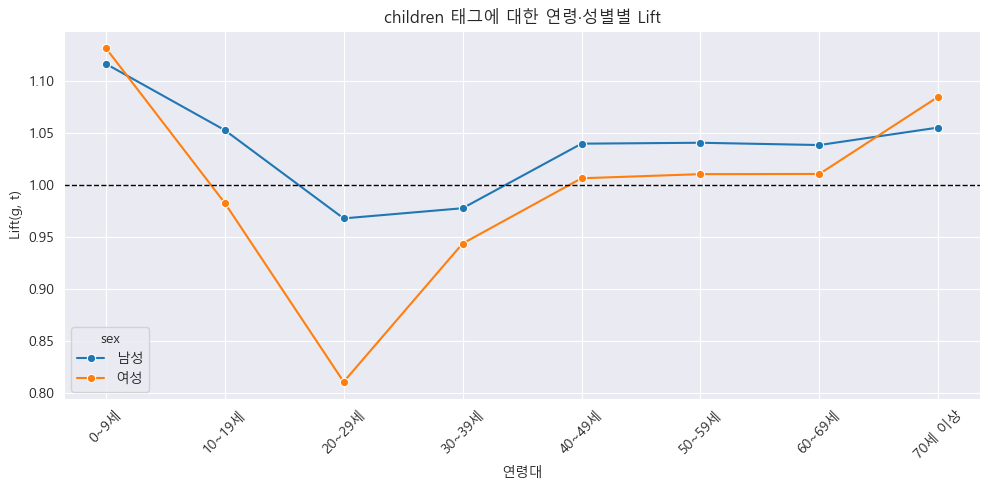

In [31]:
target_tag = "children"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

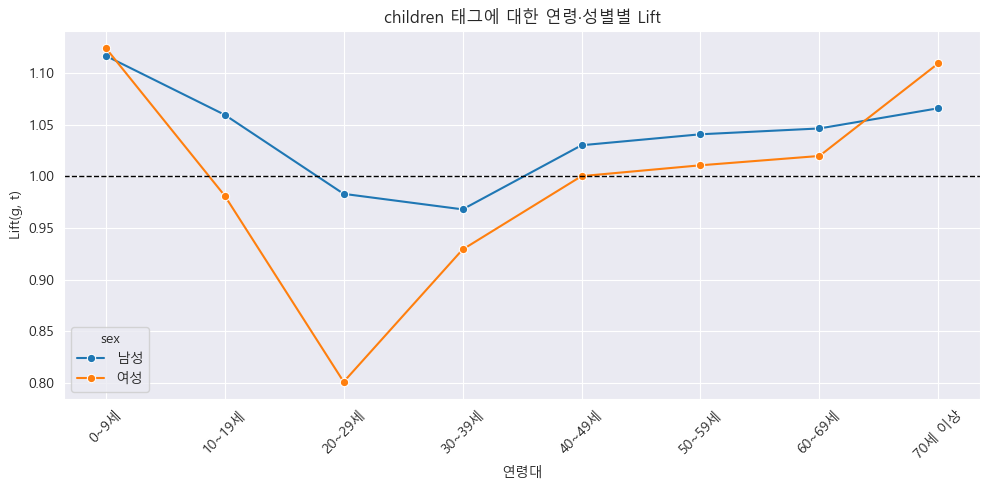

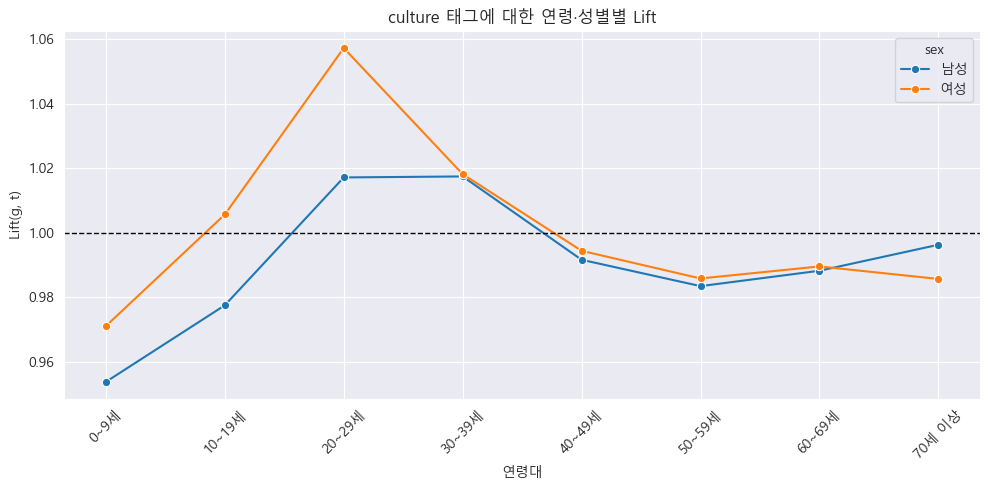

In [32]:
target_tag = "culture"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

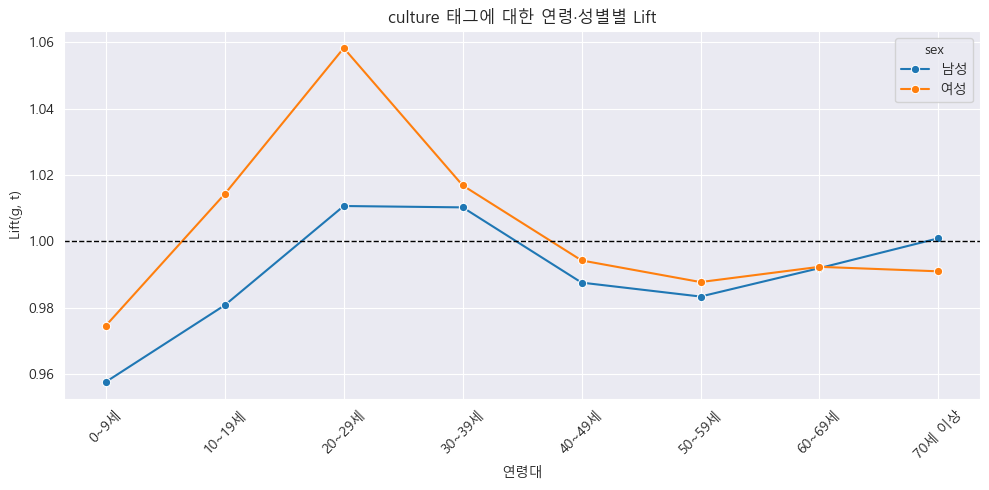

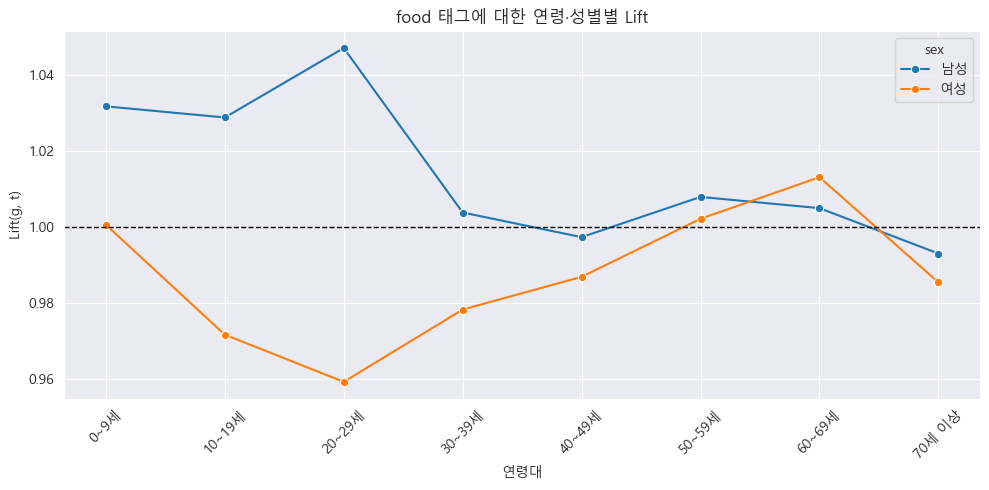

In [33]:
target_tag = "food"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

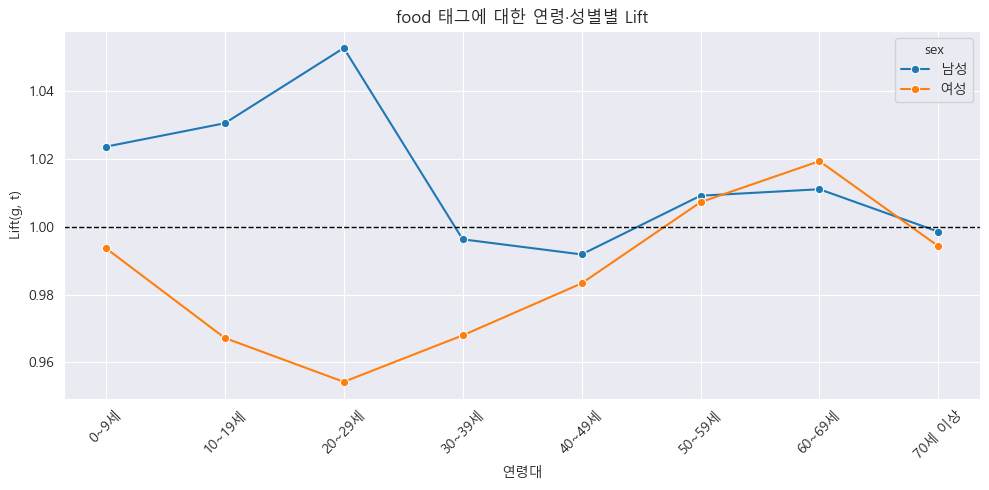

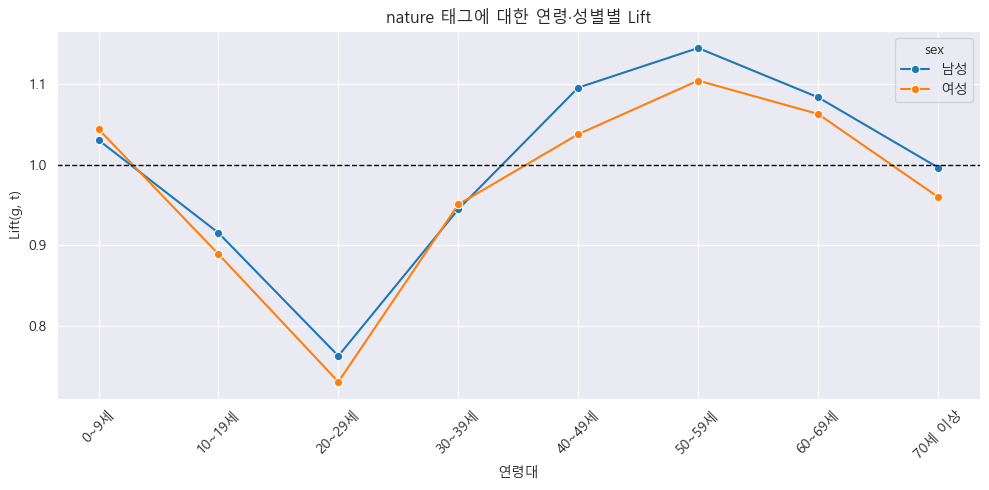

In [34]:
target_tag = "nature"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

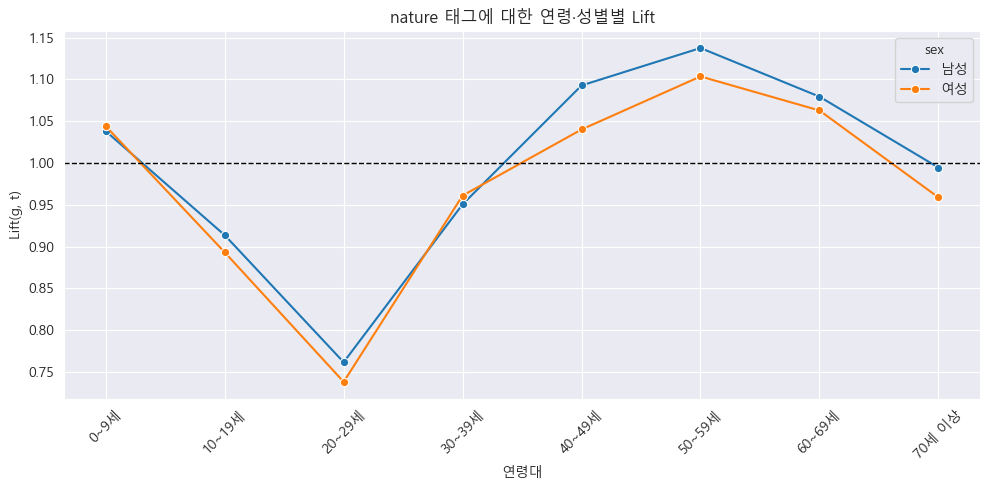

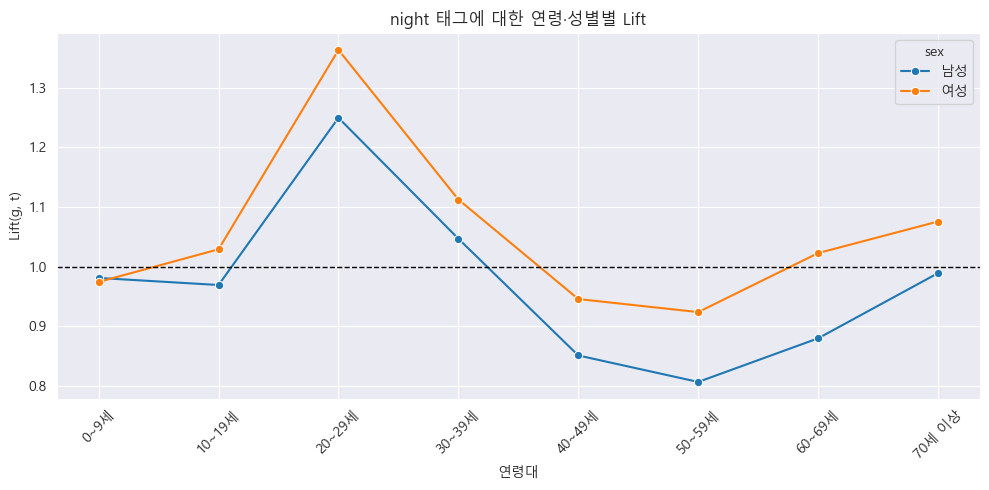

In [35]:
target_tag = "night"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

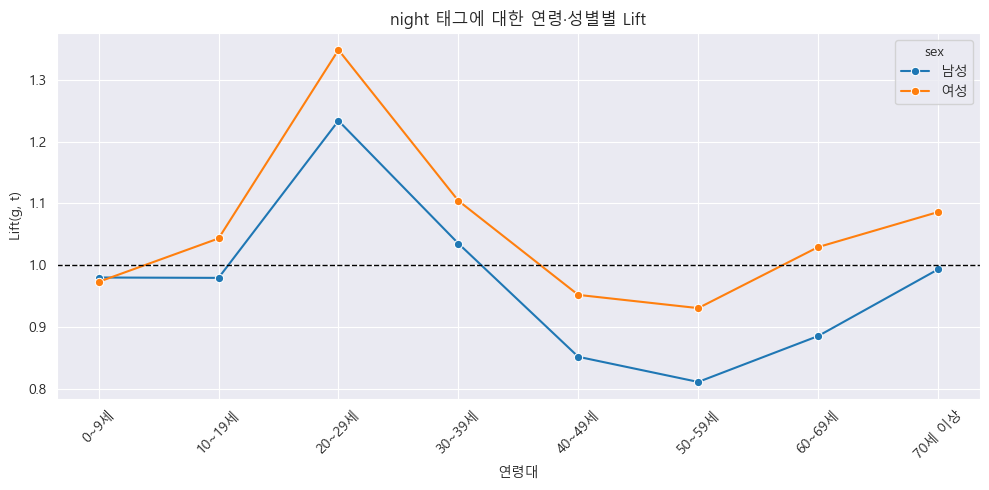

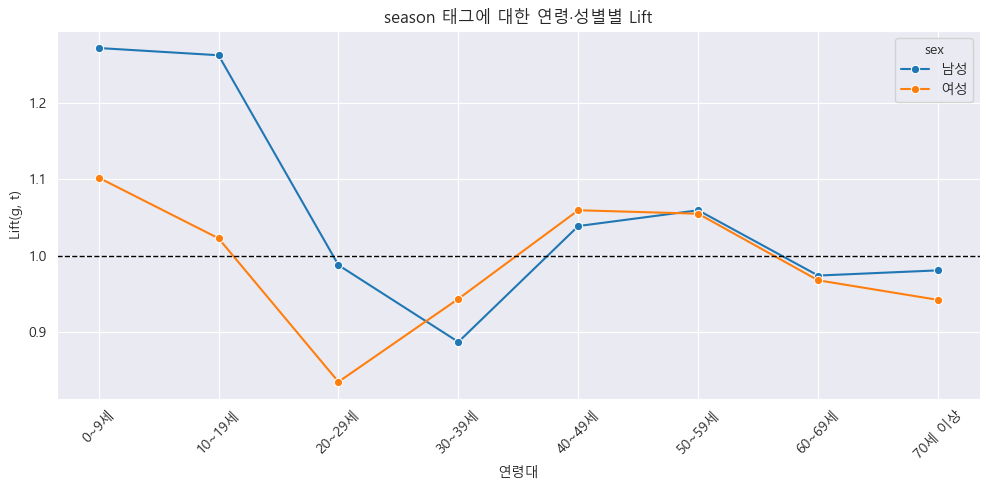

In [36]:
target_tag = "season"

df_plot = tag_lift[tag_lift["tag"] == target_tag].copy()

age_order = ["0~9세", "10~19세", "20~29세", "30~39세", "40~49세", "50~59세", "60~69세", "70세 이상"]

df_plot["age_group"] = pd.Categorical(df_plot["age_group"], categories=age_order, ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="age_group", y="lift_gt", hue="sex", marker="o")

plt.axhline(y=1.0, color="black", linestyle="--", linewidth=1)

plt.title(f"{target_tag} 태그에 대한 연령·성별별 Lift")
plt.xlabel("연령대")
plt.ylabel("Lift(g, t)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

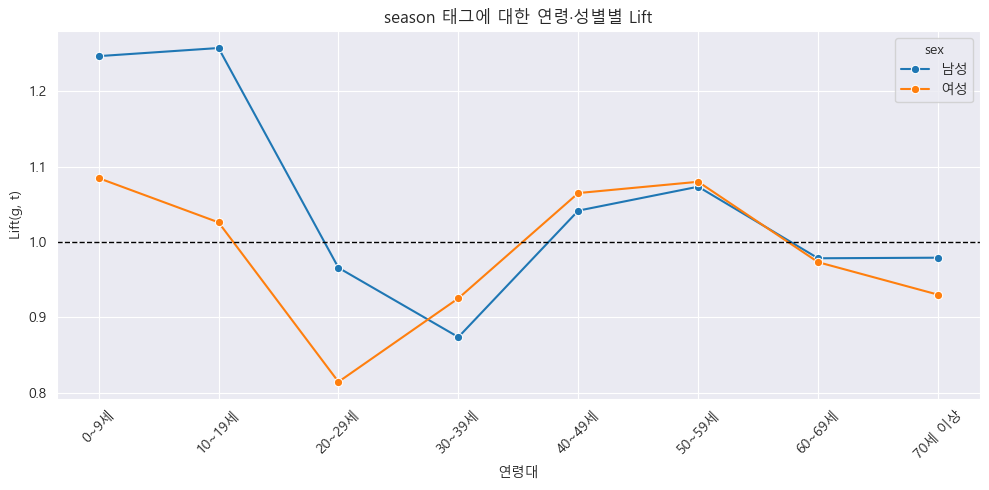

In [37]:
tag_lift = tag_lift[["tag", "sex", "age_group", "lift_gt"]]

In [38]:
tag_lift.to_json("ai_score_data/tag_lift.json", force_ascii=False)
tag_lift

,tag,sex,age_group,lift_gt
0,activity,남성,0~9세,0.986170
1,activity,남성,10~19세,0.996223
2,activity,남성,20~29세,1.003103
3,activity,남성,30~39세,1.020722
4,activity,남성,40~49세,1.014141
...,...,...,...,...
107,season,여성,30~39세,0.943055
108,season,여성,40~49세,1.059489
109,season,여성,50~59세,1.054923
110,season,여성,60~69세,0.967434
